## Pengaruh Jumlah Vaksinasi Kelompok Umur Terhadap Jumlah Positif COVID-19

#### Data Preprocessing & EDA

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt

In [2]:
DATA_PARENT_DIR = 'dataset'
RAW_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'raw')
PROCESSED_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'processed')
FINAL_PARENT_DIR = os.path.join(DATA_PARENT_DIR, 'final')

In [3]:
data_lab = pd.read_csv(os.path.join(RAW_PARENT_DIR,'Hasil Lab.csv'))
data_vaksin = pd.read_csv(os.path.join(RAW_PARENT_DIR,'Vaksinasi.csv'))

In [4]:
data_lab.head()

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,Unnamed: 9
0,29/02/2020,40,0,40,0.00%,40,0,40,0.0%,NaN
1,1/3/2020,39,0,39,0.00%,39,0,39,0.0%,NaN
2,2/3/2020,3,0,3,0.00%,3,0,3,0.0%,NaN
3,3/3/2020,15,3,12,20.00%,15,3,12,20.0%,NaN
4,4/3/2020,7,0,7,0.00%,7,0,7,0.0%,NaN


In [5]:
#menghapus kolom terakhir yang tidak terpakai
data_lab = data_lab.iloc[:, :-1]
data_lab.head()

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian
0,29/02/2020,40,0,40,0.00%,40,0,40,0.0%
1,1/3/2020,39,0,39,0.00%,39,0,39,0.0%
2,2/3/2020,3,0,3,0.00%,3,0,3,0.0%
3,3/3/2020,15,3,12,20.00%,15,3,12,20.0%
4,4/3/2020,7,0,7,0.00%,7,0,7,0.0%


In [6]:
data_lab.describe()

,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Total Spesimen di Test,Positif,Negatif
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,10880.635691,1289.660362,9590.975329,13098.584704,2531.897204,10566.708059
std,9269.765350,2186.434526,7655.413649,11384.837356,4267.797395,7968.918300
min,3.000000,0.000000,3.000000,3.000000,0.000000,3.000000
25%,4082.000000,128.750000,3850.250000,4763.750000,299.000000,4222.000000
50%,9350.000000,600.500000,8337.500000,11582.000000,1085.500000,9713.500000
75%,14461.250000,1356.250000,13264.500000,17294.000000,2804.250000,14401.000000
max,60664.000000,15825.000000,49957.000000,86663.000000,33810.000000,52853.000000


In [7]:
data_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Tanggal                            1216 non-null   object
 1   Jumlah Orang di Test               1216 non-null   int64 
 2   Orang Positif Harian               1216 non-null   int64 
 3   Orang Negatif Harian               1216 non-null   int64 
 4   Positivity Rate Kasus Baru Harian  1216 non-null   object
 5   Total Spesimen di Test             1216 non-null   int64 
 6   Positif                            1216 non-null   int64 
 7   Negatif                            1216 non-null   int64 
 8   Positivity Rate Spesimen Harian    1216 non-null   object
dtypes: int64(6), object(3)
memory usage: 85.6+ KB


In [8]:
# Konversi kolom 'Tanggal' ke format datetime dengan menangkap data yang gagal dikonversi
failed_conversion = []
for index, value in data_lab['Tanggal'].items():
    try:
        pd.to_datetime(value, format="%d/%m/%Y")
    except ValueError:
        failed_conversion.append(index)

# Tampilkan indeks sel data yang memiliki format berbeda
for value in failed_conversion:
    print(data_lab['Tanggal'][value])

# diketahui perbedaan format : spasi di akhir string dan tambahan nol pada bulan

29/02/2020 
13/03/2020 
14/03/2020 
15/03/2020 
16/03/2020 
17/03/2020 
18/03/2020 
19/03/2020 
20/03/2020 
21/03/2020 
22/03/2020 
23/03/2020 
24/03/2020 
25/03/2020 
26/03/2020 
27/03/2020 
28/03/2020 
29/03/2020 
30/03/2020 
31/03/2020 
13/04/2020 
14/04/2020 
15/04/2020 
16/04/2020 
17/04/2020 
18/04/2020 
19/04/2020 
20/04/2020 
21/04/2020 
22/04/2020 
23/04/2020 
24/04/2020 
25/04/2020 
26/04/2020 
27/04/2020 
28/04/2020 
29/04/2020 
30/04/2020 
13/05/2020 
14/05/2020 
15/05/2020 
16/05/2020 
17/05/2020 
18/05/2020 
19/05/2020 
20/05/2020 
21/05/2020 
22/05/2020 
23/05/2020 
24/05/2020 
25/05/2020 
26/05/2020 
27/05/2020 
28/05/2020 
29/05/2020 
30/05/2020 
31/05/2020 
13/06/2020 
14/06/2020 
15/06/2020 
16/06/2020 
17/06/2020 
18/06/2020 
19/06/2020 
20/06/2020 
21/06/2020 
22/06/2020 
23/06/2020 
24/06/2020 
25/06/2020 
26/06/2020 
27/06/2020 
28/06/2020 
29/06/2020 
30/06/2020 
13/07/2020 
14/07/2020 
15/07/2020 
16/07/2020 
17/07/2020 
18/07/2020 
19/07/2020 
20/07/2020 
21/0

In [9]:
# cek format data yang benar
print(data_lab['Tanggal'][2])

2/3/2020


In [10]:
# Hapus spasi di akhir string
data_lab['Tanggal'] = data_lab['Tanggal'].str.rstrip()

In [11]:
data_lab['Tanggal'] = pd.to_datetime(data_lab['Tanggal'], format="%d/%m/%Y", dayfirst=True)

In [12]:
data_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            1216 non-null   datetime64[ns]
 1   Jumlah Orang di Test               1216 non-null   int64         
 2   Orang Positif Harian               1216 non-null   int64         
 3   Orang Negatif Harian               1216 non-null   int64         
 4   Positivity Rate Kasus Baru Harian  1216 non-null   object        
 5   Total Spesimen di Test             1216 non-null   int64         
 6   Positif                            1216 non-null   int64         
 7   Negatif                            1216 non-null   int64         
 8   Positivity Rate Spesimen Harian    1216 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 85.6+ KB


PROSES DATA VAKSIN

In [13]:
data_vaksin.head()

,Tanggal,TV Nakes,V1 Nakes,V2 Nakes,P1 Nakes,P2 Nakes,TV Lansia,V1 Lansia,V2 Lansia,P1 Lansia,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,5-Mar-21,112301.0,141425.0,91078.0,125.90%,81.10%,911631.0,76451.0,0.0,8.39%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6-Mar-21,112301.0,144046.0,91379.0,128.30%,81.40%,911631.0,79421.0,0.0,8.71%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7-Mar-21,112301.0,177126.0,91460.0,157.70%,81.40%,911631.0,83628.0,0.0,9.17%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8-Mar-21,112301.0,181237.0,92988.0,161.40%,82.80%,911631.0,95140.0,1.0,10.44%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9-Mar-21,112301.0,113326.0,89984.0,100.90%,80.10%,911631.0,135128.0,675.0,14.82%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_vaksin.describe()

,TV Nakes,V1 Nakes,V2 Nakes,TV Lansia,V1 Lansia,V2 Lansia,TV MU,V1 MU,V2 MU,TV DKI Total,...,TV usia_tengah,V1 usia_tengah,V2 usia_tengah,TV usia_muda,V1 usia_muda,V2 usia_muda,VGR V1,VGR V2,V3 MU,V4 MU
count,849.0,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,8.490000e+02,8.490000e+02,8.490000e+02,...,7.310000e+02,7.310000e+02,7.310000e+02,559.0,559.000000,559.000000,849.000000,849.000000,5.340000e+02,152.000000
mean,112301.0,172897.334511,162884.515901,949335.603062,748681.545347,660192.355713,1976757.0,9.569046e+06,7.651930e+06,8.948504e+06,...,9.933521e+05,1.247869e+06,1.005639e+06,1142505.0,823750.840787,662169.177102,191089.580683,180400.183746,4.241867e+06,278345.756579
std,0.0,21237.375067,25332.799793,71784.384577,120774.005328,159754.792795,0.0,3.612674e+06,3.469347e+06,2.286459e+06,...,3.817034e+03,2.908643e+05,3.025988e+05,0.0,81921.491800,170258.420445,75404.979702,79764.950100,1.471511e+06,84287.801077
min,112301.0,113326.000000,89984.000000,761279.000000,76451.000000,0.000000,1976757.0,6.412100e+04,0.000000e+00,3.000689e+06,...,9.847190e+05,6.820000e+02,0.000000e+00,1142505.0,123843.000000,19.000000,0.000000,0.000000,5.303200e+04,31041.000000
25%,112301.0,179781.000000,166415.000000,911631.000000,764676.000000,651907.000000,1976757.0,9.624944e+06,7.025165e+06,8.941211e+06,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,830005.500000,698579.000000,216652.000000,194922.000000,3.781593e+06,309202.000000
50%,112301.0,184450.000000,177138.000000,992461.000000,799339.000000,730493.000000,1976757.0,1.154290e+07,9.766393e+06,1.008372e+07,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,847694.000000,720924.000000,227248.000000,222576.000000,4.968662e+06,315803.000000
75%,112301.0,184450.000000,177138.000000,992461.000000,806776.000000,740444.000000,1976757.0,1.170196e+07,9.986242e+06,1.008372e+07,...,9.936870e+05,1.377790e+06,1.136853e+06,1142505.0,850152.000000,727166.000000,227248.000000,222576.000000,5.301612e+06,315803.000000
max,112301.0,184450.000000,177138.000000,992461.000000,829949.000000,742127.000000,1976757.0,1.180099e+07,1.003559e+07,1.008372e+07,...,1.000121e+06,1.377790e+06,1.136853e+06,1142505.0,852466.000000,730570.000000,227788.000000,223026.000000,5.345352e+06,315803.000000


In [15]:
data_vaksin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         849 non-null    object 
 1   TV Nakes        849 non-null    float64
 2   V1 Nakes        849 non-null    float64
 3   V2 Nakes        849 non-null    float64
 4   P1 Nakes        849 non-null    object 
 5   P2 Nakes        849 non-null    object 
 6   TV Lansia       849 non-null    float64
 7   V1 Lansia       849 non-null    float64
 8   V2 Lansia       849 non-null    float64
 9   P1 Lansia       849 non-null    object 
 10  P2 Lansia       849 non-null    object 
 11  TV MU           849 non-null    float64
 12  V1 MU           849 non-null    float64
 13  V2 MU           849 non-null    float64
 14  P1 MU           849 non-null    object 
 15  P2 MU           849 non-null    object 
 16  TV DKI Total    849 non-null    float64
 17  V1 DKI Total    849 non-null    flo

In [16]:
data_vaksin['Tanggal'] = pd.to_datetime(data_vaksin['Tanggal'], format="%d-%b-%y")

In [17]:
data_vaksin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         849 non-null    datetime64[ns]
 1   TV Nakes        849 non-null    float64       
 2   V1 Nakes        849 non-null    float64       
 3   V2 Nakes        849 non-null    float64       
 4   P1 Nakes        849 non-null    object        
 5   P2 Nakes        849 non-null    object        
 6   TV Lansia       849 non-null    float64       
 7   V1 Lansia       849 non-null    float64       
 8   V2 Lansia       849 non-null    float64       
 9   P1 Lansia       849 non-null    object        
 10  P2 Lansia       849 non-null    object        
 11  TV MU           849 non-null    float64       
 12  V1 MU           849 non-null    float64       
 13  V2 MU           849 non-null    float64       
 14  P1 MU           849 non-null    object        
 15  P2 MU 

In [18]:
data_vaksin.head()

,Tanggal,TV Nakes,V1 Nakes,V2 Nakes,P1 Nakes,P2 Nakes,TV Lansia,V1 Lansia,V2 Lansia,P1 Lansia,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2021-03-05,112301.0,141425.0,91078.0,125.90%,81.10%,911631.0,76451.0,0.0,8.39%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-06,112301.0,144046.0,91379.0,128.30%,81.40%,911631.0,79421.0,0.0,8.71%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-07,112301.0,177126.0,91460.0,157.70%,81.40%,911631.0,83628.0,0.0,9.17%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-08,112301.0,181237.0,92988.0,161.40%,82.80%,911631.0,95140.0,1.0,10.44%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-09,112301.0,113326.0,89984.0,100.90%,80.10%,911631.0,135128.0,675.0,14.82%,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


merger data_lab dengan data_vaksin dengan konsep inner join agar hanya yang memiliki tanggal yang sama saja yang dimasukkan

In [19]:
# Menggabungkan data menggunakan metode left join
merged_data = pd.merge(data_lab, data_vaksin, on='Tanggal', how='inner')

# Mengisi nilai NaN dengan 0
merged_data = merged_data.fillna(0)

merged_data

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2021-03-05,8787,1616,7171,18.40%,11875,3639,8236,30.6%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2021-03-06,8261,1834,6427,22.20%,10327,3116,7211,30.2%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2021-03-07,11041,1783,9258,16.10%,5460,1356,4104,24.8%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2021-03-08,12172,867,11305,7.10%,15215,3357,11858,22.1%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2021-03-09,13813,1040,12773,7.50%,17709,4373,13336,24.7%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2023-06-26,842,19,823,2.30%,852,27,825,3.2%,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591258
845,2023-06-27,1126,11,1115,1.00%,1168,46,1122,3.9%,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
846,2023-06-28,749,8,741,1.10%,765,19,746,2.5%,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
847,2023-06-29,384,11,373,2.90%,394,12,382,3.0%,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418


In [20]:
merged_data.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-kotor.csv'), index=False)

Data cleaning

In [21]:
data_kotor = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR, 'data-inti-kotor.csv'))
data_kotor.head()

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2021-03-05,8787,1616,7171,18.40%,11875,3639,8236,30.6%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2021-03-06,8261,1834,6427,22.20%,10327,3116,7211,30.2%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2021-03-07,11041,1783,9258,16.10%,5460,1356,4104,24.8%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2021-03-08,12172,867,11305,7.10%,15215,3357,11858,22.1%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2021-03-09,13813,1040,12773,7.50%,17709,4373,13336,24.7%,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0


In [22]:
data_kotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            849 non-null    object 
 1   Jumlah Orang di Test               849 non-null    int64  
 2   Orang Positif Harian               849 non-null    int64  
 3   Orang Negatif Harian               849 non-null    int64  
 4   Positivity Rate Kasus Baru Harian  849 non-null    object 
 5   Total Spesimen di Test             849 non-null    int64  
 6   Positif                            849 non-null    int64  
 7   Negatif                            849 non-null    int64  
 8   Positivity Rate Spesimen Harian    849 non-null    object 
 9   TV Nakes                           849 non-null    float64
 10  V1 Nakes                           849 non-null    float64
 11  V2 Nakes                           849 non-null    float64

In [23]:
data_kotor['Positivity Rate Kasus Baru Harian'] = data_kotor['Positivity Rate Kasus Baru Harian'].str.replace('%', '')
data_kotor['Positivity Rate Spesimen Harian'] = data_kotor['Positivity Rate Spesimen Harian'].str.replace('%', '')



In [24]:
data_kotor['Positivity Rate Kasus Baru Harian'] = data_kotor['Positivity Rate Kasus Baru Harian'].astype(float)
data_kotor['Positivity Rate Spesimen Harian'] = data_kotor['Positivity Rate Spesimen Harian'].astype(float)

In [25]:
data_kotor['Positivity Rate Kasus Baru Harian'] = data_kotor['Positivity Rate Kasus Baru Harian']/100
data_kotor['Positivity Rate Spesimen Harian'] = data_kotor['Positivity Rate Spesimen Harian']/100

In [26]:
data_kotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            849 non-null    object 
 1   Jumlah Orang di Test               849 non-null    int64  
 2   Orang Positif Harian               849 non-null    int64  
 3   Orang Negatif Harian               849 non-null    int64  
 4   Positivity Rate Kasus Baru Harian  849 non-null    float64
 5   Total Spesimen di Test             849 non-null    int64  
 6   Positif                            849 non-null    int64  
 7   Negatif                            849 non-null    int64  
 8   Positivity Rate Spesimen Harian    849 non-null    float64
 9   TV Nakes                           849 non-null    float64
 10  V1 Nakes                           849 non-null    float64
 11  V2 Nakes                           849 non-null    float64

In [27]:
data_kotor.head()

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2021-03-05,8787,1616,7171,0.184,11875,3639,8236,0.306,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2021-03-06,8261,1834,6427,0.222,10327,3116,7211,0.302,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2021-03-07,11041,1783,9258,0.161,5460,1356,4104,0.248,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2021-03-08,12172,867,11305,0.071,15215,3357,11858,0.221,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2021-03-09,13813,1040,12773,0.075,17709,4373,13336,0.247,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0


In [28]:
data_kotor.describe()

,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,V1 Nakes,...,V1 usia_muda,V2 usia_muda,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,8.490000e+02,849.000000,849.000000,849.000000,849.000000
mean,11903.053004,1439.031802,10464.021201,0.097517,14168.275618,2683.380448,11484.924617,0.143534,112301.0,172897.334511,...,542374.480565,435981.613663,191089.580683,180400.183746,59257.102473,2.667897e+06,185973.183746,21120.220259,49482.916372,95231.843345
std,10167.998061,2527.110052,8316.655399,0.084862,12723.567144,4929.617092,8775.953723,0.114129,0.0,21237.375067,...,396492.827132,343220.913597,75404.979702,79764.950100,45987.709349,2.358877e+06,214126.819119,35676.450392,112234.005437,198257.569302
min,384.000000,8.000000,329.000000,0.001000,394.000000,12.000000,332.000000,0.002000,112301.0,113326.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4725.000000,127.000000,4377.000000,0.029000,5641.000000,200.000000,4793.000000,0.042000,112301.0,179781.000000,...,0.000000,0.000000,216652.000000,194922.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,9705.000000,551.000000,8788.000000,0.081000,11752.000000,969.000000,10155.000000,0.132000,112301.0,184450.000000,...,829841.000000,698426.000000,227248.000000,222576.000000,87103.000000,3.633260e+06,0.000000,0.000000,0.000000,0.000000
75%,15239.000000,1484.000000,14120.000000,0.142000,18110.000000,2643.000000,15987.000000,0.217000,112301.0,184450.000000,...,849383.000000,724445.000000,227248.000000,222576.000000,98686.000000,5.134512e+06,433367.000000,72917.000000,0.000000,34868.000000
max,60664.000000,15825.000000,49957.000000,0.463000,86663.000000,33810.000000,52853.000000,0.517000,112301.0,184450.000000,...,852466.000000,730570.000000,227788.000000,223026.000000,103404.000000,5.345352e+06,446479.000000,84045.000000,315803.000000,591496.000000


In [29]:
data_kotor.tail()

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
844,2023-06-26,842,19,823,0.023,852,27,825,0.032,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591258
845,2023-06-27,1126,11,1115,0.010,1168,46,1122,0.039,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
846,2023-06-28,749,8,741,0.011,765,19,746,0.025,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
847,2023-06-29,384,11,373,0.029,394,12,382,0.030,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
848,2023-06-29,384,11,373,0.029,394,12,382,0.030,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591496


Mencari Trend Data

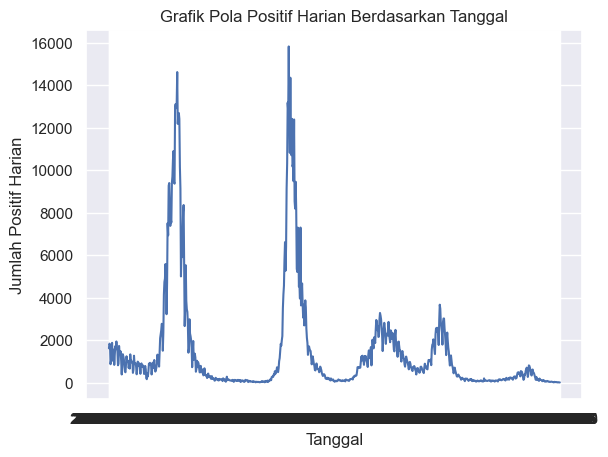

In [30]:
# mencari trend data Orang Positif Harian terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="Orang Positif Harian", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Positif Harian")
plt.title("Grafik Pola Positif Harian Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

# diketahui bahwa data meninggal terus bertambah seiring berjalannya waktu karena berisi data kumulatif

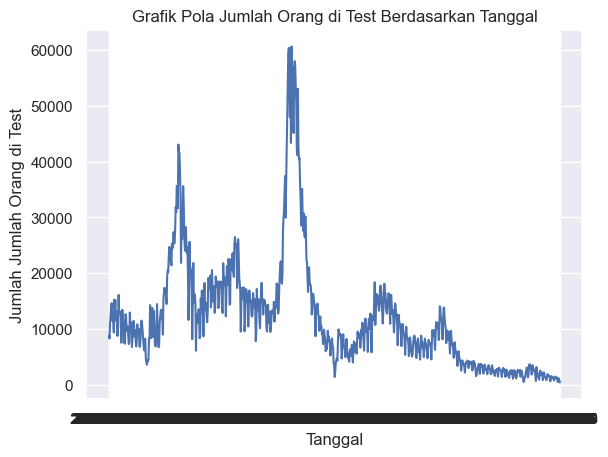

In [31]:
# mencari trend data Jumlah Orang di Test terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="Jumlah Orang di Test", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Jumlah Orang di Test")
plt.title("Grafik Pola Jumlah Orang di Test Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

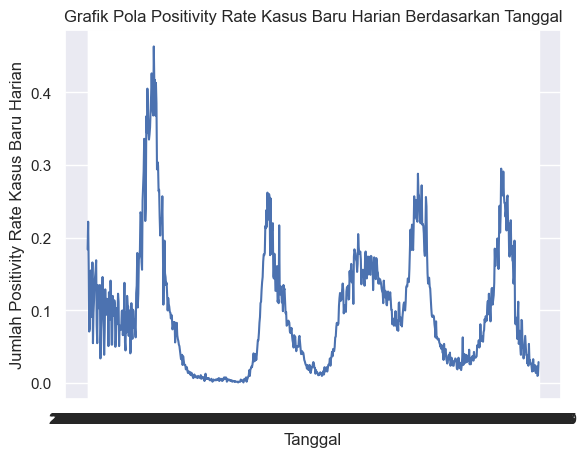

In [32]:
# mencari trend data Positivity Rate Kasus Baru Harian terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="Positivity Rate Kasus Baru Harian", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Positivity Rate Kasus Baru Harian")
plt.title("Grafik Pola Positivity Rate Kasus Baru Harian Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

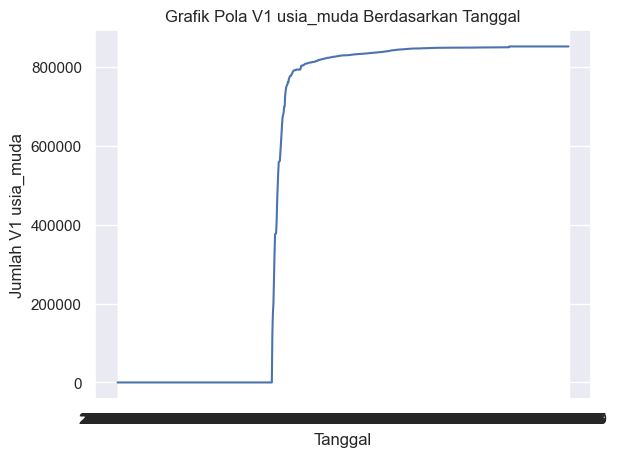

In [33]:
# mencari trend data V1 usia_muda terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V1 usia_muda", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V1 usia_muda")
plt.title("Grafik Pola V1 usia_muda Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

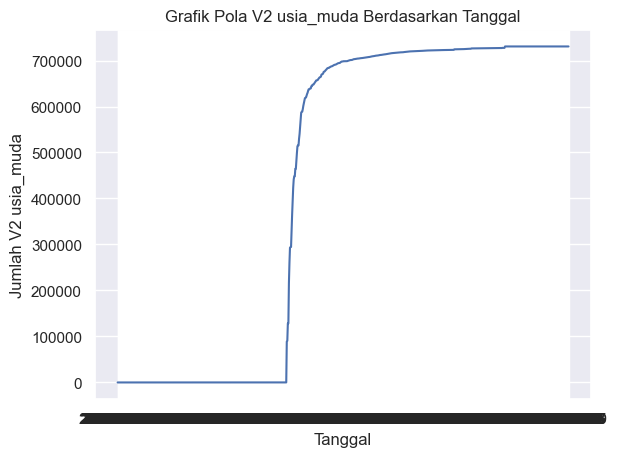

In [34]:
# mencari trend data V2 usia_muda terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V2 usia_muda", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V2 usia_muda")
plt.title("Grafik Pola V2 usia_muda Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

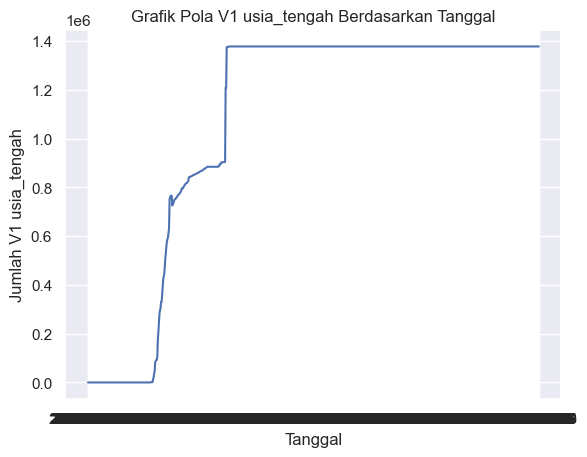

In [35]:
# mencari trend data V1 usia_tengah terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V1 usia_tengah", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V1 usia_tengah")
plt.title("Grafik Pola V1 usia_tengah Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

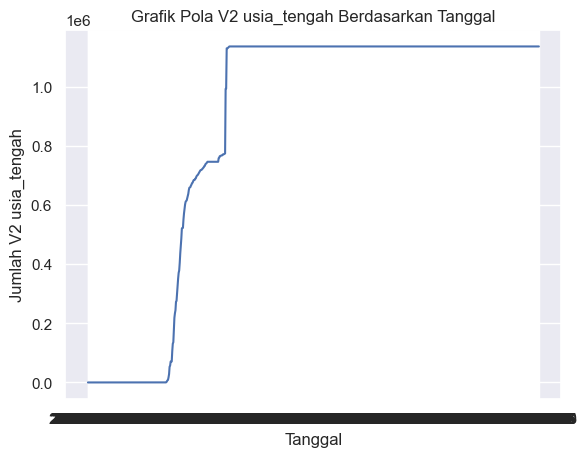

In [36]:
# mencari trend data V2 usia_tengah terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V2 usia_tengah", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V2 usia_tengah")
plt.title("Grafik Pola V2 usia_tengah Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

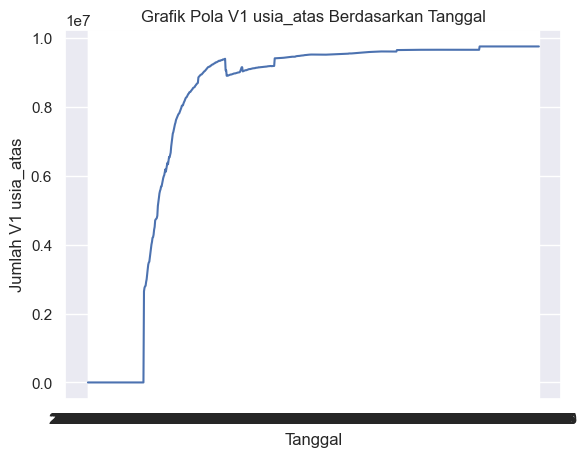

In [37]:
# mencari trend data V1 usia_atas terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V1 usia_atas", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V1 usia_atas")
plt.title("Grafik Pola V1 usia_atas Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

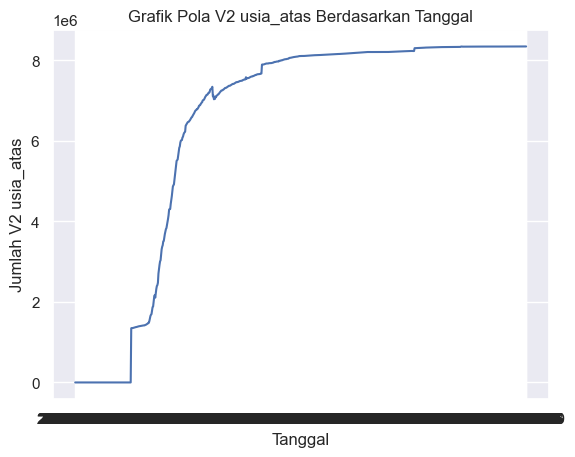

In [38]:
# mencari trend data V2 usia_atas terhadap tanggal
sns.set(style="darkgrid")

# Membuat line plot
sns.lineplot(x="Tanggal", y="V2 usia_atas", data=data_kotor)

# Mengatur label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah V2 usia_atas")
plt.title("Grafik Pola V2 usia_atas Berdasarkan Tanggal")

# Menampilkan grafik
plt.show()

analisis dasar terhadap efektivitas vaksinasi pada kelompok usia

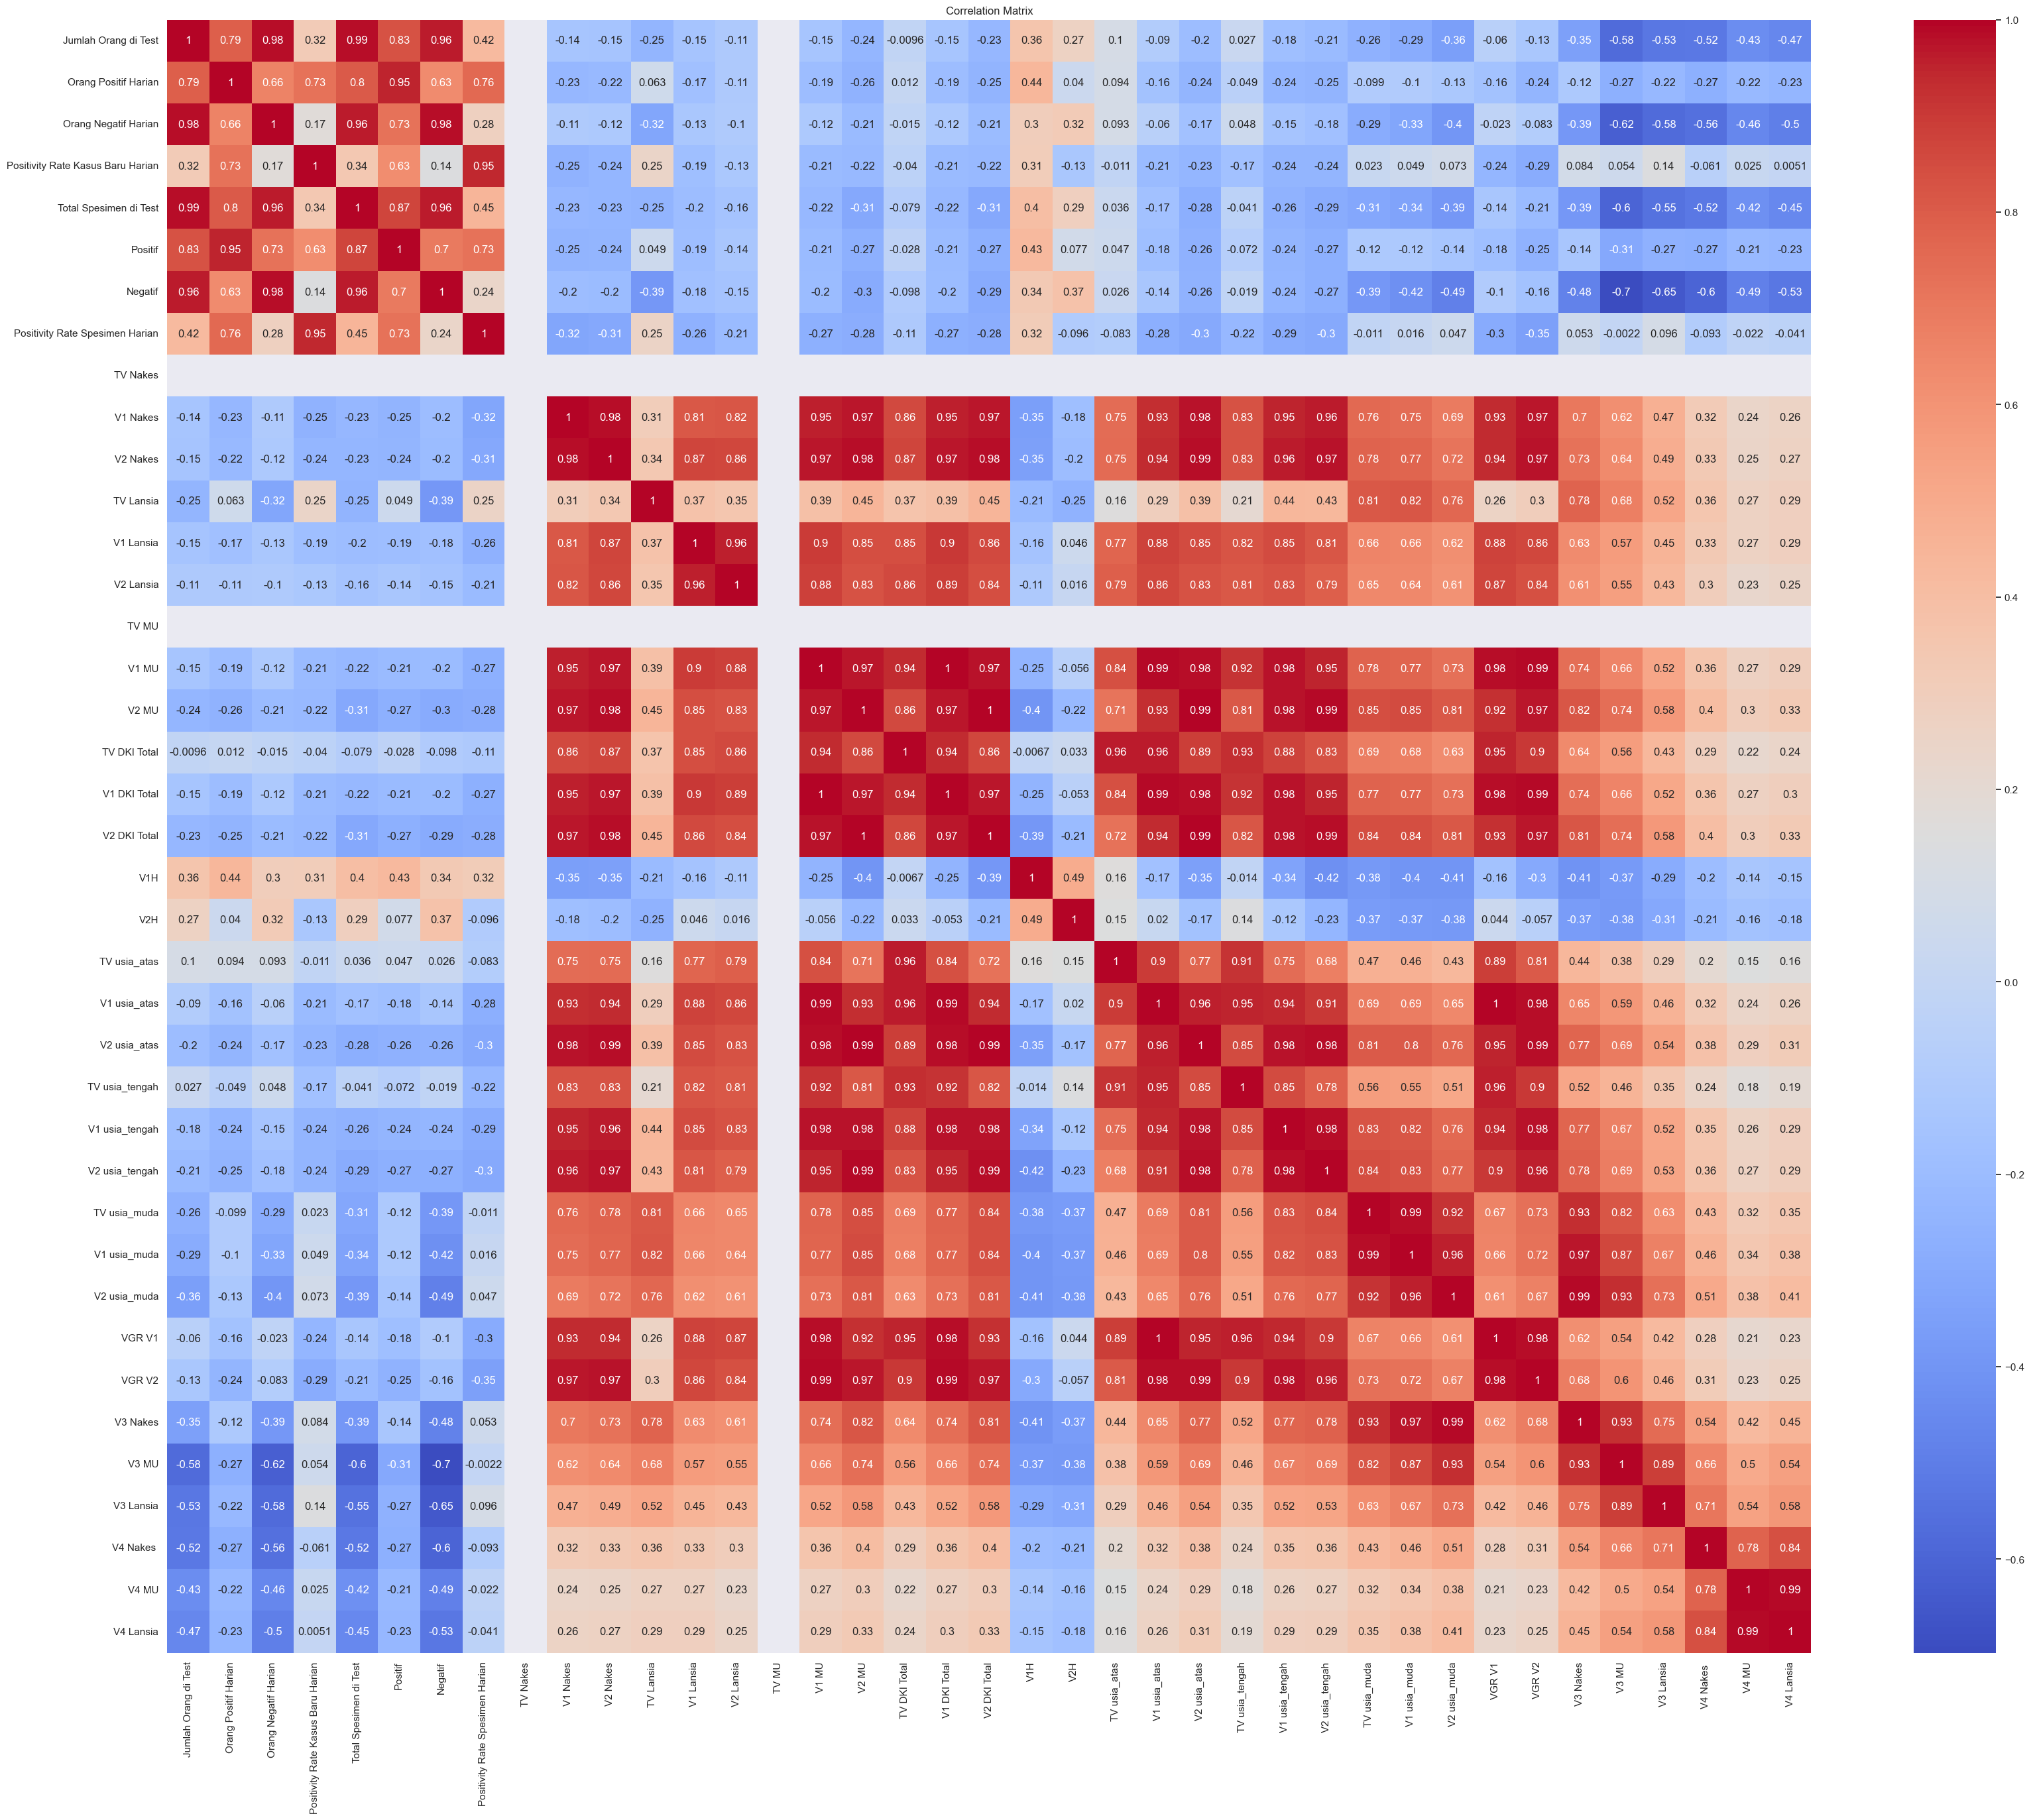

In [39]:
plt.subplots(figsize=(40, 32))

# Menghitung matriks korelasi
corr_matrix = data_kotor.corr()

# Membuat heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Mengatur judul
plt.title("Correlation Matrix")

# Menampilkan heatmap
plt.show()

analisis dasar lanjutan untuk membadingkan vaksinasi pada masing-masing kelompok usia. untuk itu, dilakukan scatterplot untuk melihat korelasi masing-masing kelompok usia tersebut dengan data orang positif harian.

*tidak menggunakan pairplot karena akan memakan waktu yang jauh lebih lama

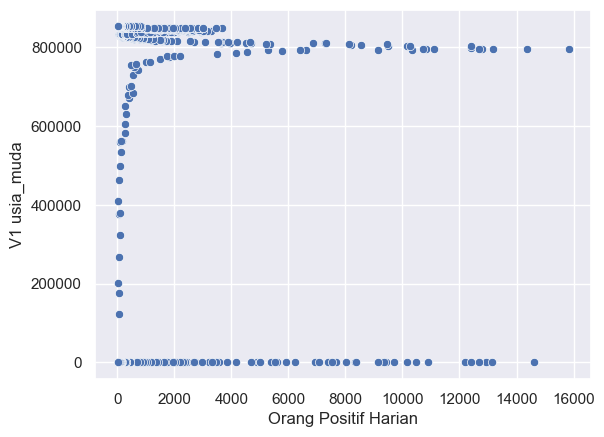

In [40]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V1 usia_muda')
plt.show()

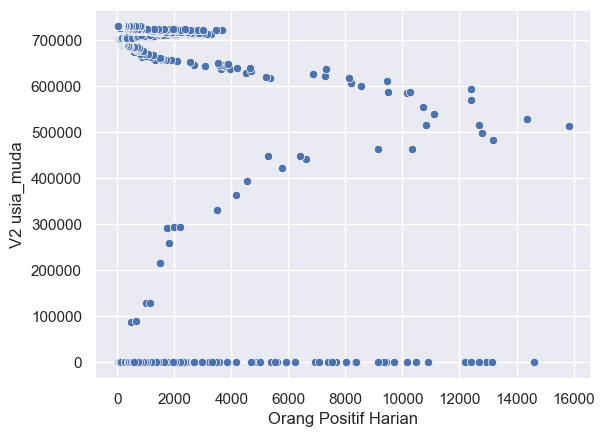

In [41]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V2 usia_muda')
plt.show()

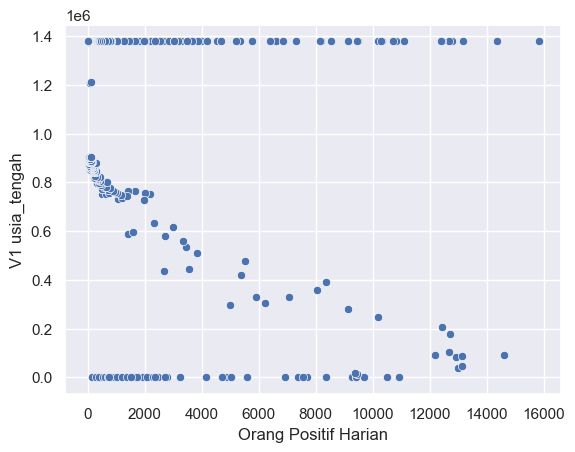

In [42]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V1 usia_tengah')
plt.show()

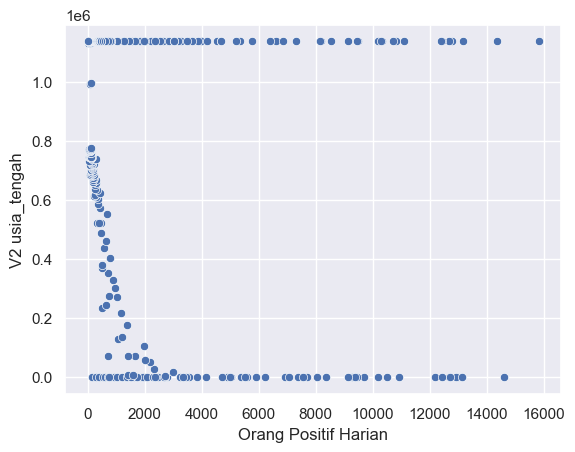

In [43]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V2 usia_tengah')
plt.show()

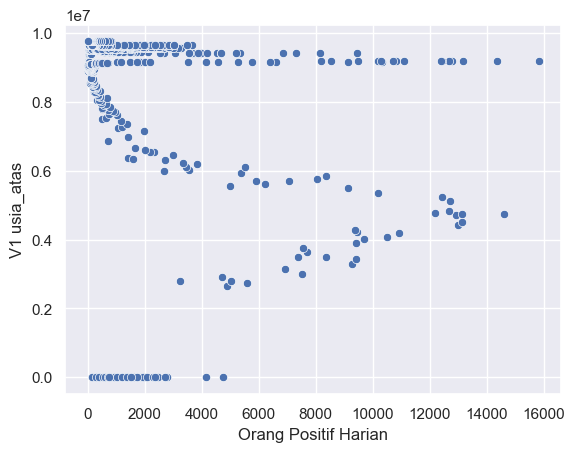

In [44]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V1 usia_atas')
plt.show()

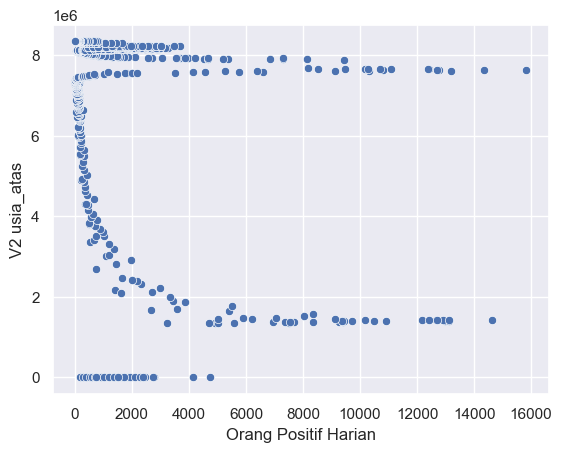

In [45]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='V2 usia_atas')
plt.show()

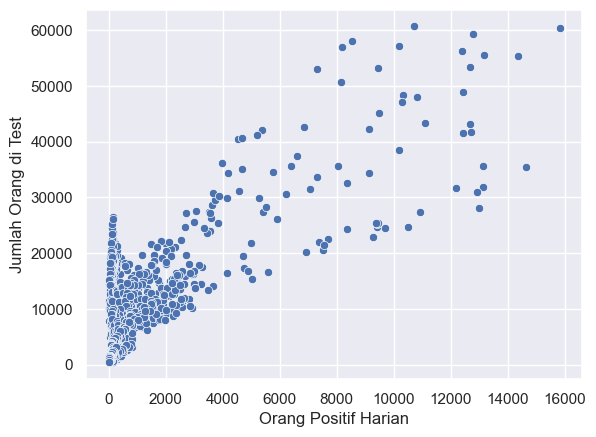

In [46]:
sns.scatterplot(data=data_kotor, x='Orang Positif Harian', y='Jumlah Orang di Test')
plt.show()

sekilas, vaksinasi pada usia atas dan usia tengah terlihat lebih berdampak dalam mengurangi jumlah orang positif harian dibandingkan dengan kelompok usia muda, akan tetapi perbedaannya cukup kecil. 
terlihat juga jika sepertinya jumlah orang positif harian berbanding lurus dengan jumlah orang yang di test.

In [47]:
data_kotor.to_csv(os.path.join(PROCESSED_PARENT_DIR, 'data_bersih.csv'), index=False)

selanjutnya, untuk analisis mendalam akan digunakan data yang sudah spesifik kepada cakupan masalah.

#### Feature Engineering & Modelling

In [48]:
data = pd.read_csv(os.path.join(PROCESSED_PARENT_DIR, 'data_bersih.csv'))
data

,Tanggal,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,...,PVJ D1,PVJ D2,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
0,2021-03-05,8787,1616,7171,0.184,11875,3639,8236,0.306,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
1,2021-03-06,8261,1834,6427,0.222,10327,3116,7211,0.302,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
2,2021-03-07,11041,1783,9258,0.161,5460,1356,4104,0.248,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
3,2021-03-08,12172,867,11305,0.071,15215,3357,11858,0.221,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
4,2021-03-09,13813,1040,12773,0.075,17709,4373,13336,0.247,112301.0,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2023-06-26,842,19,823,0.023,852,27,825,0.032,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591258
845,2023-06-27,1126,11,1115,0.010,1168,46,1122,0.039,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
846,2023-06-28,749,8,741,0.011,765,19,746,0.025,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418
847,2023-06-29,384,11,373,0.029,394,12,382,0.030,112301.0,...,#DIV/0!,#DIV/0!,227248.0,222576.0,103404,5345352.0,446479,84045,315803.0,591418


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            849 non-null    object 
 1   Jumlah Orang di Test               849 non-null    int64  
 2   Orang Positif Harian               849 non-null    int64  
 3   Orang Negatif Harian               849 non-null    int64  
 4   Positivity Rate Kasus Baru Harian  849 non-null    float64
 5   Total Spesimen di Test             849 non-null    int64  
 6   Positif                            849 non-null    int64  
 7   Negatif                            849 non-null    int64  
 8   Positivity Rate Spesimen Harian    849 non-null    float64
 9   TV Nakes                           849 non-null    float64
 10  V1 Nakes                           849 non-null    float64
 11  V2 Nakes                           849 non-null    float64

In [50]:
data.describe()

,Jumlah Orang di Test,Orang Positif Harian,Orang Negatif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Negatif,Positivity Rate Spesimen Harian,TV Nakes,V1 Nakes,...,V1 usia_muda,V2 usia_muda,VGR V1,VGR V2,V3 Nakes,V3 MU,V3 Lansia,V4 Nakes,V4 MU,V4 Lansia
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.0,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,8.490000e+02,849.000000,849.000000,849.000000,849.000000
mean,11903.053004,1439.031802,10464.021201,0.097517,14168.275618,2683.380448,11484.924617,0.143534,112301.0,172897.334511,...,542374.480565,435981.613663,191089.580683,180400.183746,59257.102473,2.667897e+06,185973.183746,21120.220259,49482.916372,95231.843345
std,10167.998061,2527.110052,8316.655399,0.084862,12723.567144,4929.617092,8775.953723,0.114129,0.0,21237.375067,...,396492.827132,343220.913597,75404.979702,79764.950100,45987.709349,2.358877e+06,214126.819119,35676.450392,112234.005437,198257.569302
min,384.000000,8.000000,329.000000,0.001000,394.000000,12.000000,332.000000,0.002000,112301.0,113326.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4725.000000,127.000000,4377.000000,0.029000,5641.000000,200.000000,4793.000000,0.042000,112301.0,179781.000000,...,0.000000,0.000000,216652.000000,194922.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,9705.000000,551.000000,8788.000000,0.081000,11752.000000,969.000000,10155.000000,0.132000,112301.0,184450.000000,...,829841.000000,698426.000000,227248.000000,222576.000000,87103.000000,3.633260e+06,0.000000,0.000000,0.000000,0.000000
75%,15239.000000,1484.000000,14120.000000,0.142000,18110.000000,2643.000000,15987.000000,0.217000,112301.0,184450.000000,...,849383.000000,724445.000000,227248.000000,222576.000000,98686.000000,5.134512e+06,433367.000000,72917.000000,0.000000,34868.000000
max,60664.000000,15825.000000,49957.000000,0.463000,86663.000000,33810.000000,52853.000000,0.517000,112301.0,184450.000000,...,852466.000000,730570.000000,227788.000000,223026.000000,103404.000000,5.345352e+06,446479.000000,84045.000000,315803.000000,591496.000000


In [51]:
data.columns

Index(['Tanggal', 'Jumlah Orang di Test', 'Orang Positif Harian',
       'Orang Negatif Harian', 'Positivity Rate Kasus Baru Harian',
       'Total Spesimen di Test', 'Positif', 'Negatif',
       'Positivity Rate Spesimen Harian', 'TV Nakes', 'V1 Nakes', 'V2 Nakes',
       'P1 Nakes', 'P2 Nakes', 'TV Lansia', 'V1 Lansia', 'V2 Lansia',
       'P1 Lansia', 'P2 Lansia', 'TV MU', 'V1 MU', 'V2 MU', 'P1 MU', 'P2 MU',
       'TV DKI Total', 'V1 DKI Total', 'V2 DKI Total', 'P1 DKI Total',
       'P2 DKI total', 'V1H', 'V2H', 'TV usia_atas', 'V1 usia_atas',
       'V2 usia_atas', 'P1 usia_atas', 'P2 usia_atas', 'TV usia_tengah',
       'V1 usia_tengah', 'V2 usia_tengah', 'P1 usia_tengah', 'P2 usia_tengah',
       'TV usia_muda', 'V1 usia_muda', 'V2 usia_muda', 'P1 usia_muda',
       'P2 usia_muda', 'PVJ D1', 'PVJ D2', 'VGR V1', 'VGR V2', 'V3 Nakes',
       'V3 MU', 'V3 Lansia', 'V4 Nakes ', 'V4 MU', 'V4 Lansia'],
      dtype='object')

Untuk analisis mendalam, digunakan kolom-kolom berikut agar langsung menuju cakupan masalah dan untuk mempercepat proses analisis 
1. 'Tanggal'
2. 'Jumlah Orang di Test'
3. 'Orang Positif Harian'
4. 'Positivity Rate Kasus Baru Harian'
5. 'Total Spesimen di Test'
6. 'Positif'
7. 'Positivity Rate Spesimen Harian'
8. 'V1 usia_atas'
9. 'V2 usia_atas'
10. 'V1 usia_tengah'
11. 'V2 usia_tengah'
12. 'V1 usia_muda'
13. 'V2 usia_muda'

In [52]:
# Choose columns to be used
columns_used = ['Tanggal',
            'Jumlah Orang di Test',
            'Orang Positif Harian',
            'Positivity Rate Kasus Baru Harian',
            'Total Spesimen di Test',
            'Positif',
            'Positivity Rate Spesimen Harian',
            'V1 usia_atas',
            'V2 usia_atas',
            'V1 usia_tengah',
            'V2 usia_tengah',
            'V1 usia_muda',
            'V2 usia_muda']

# Filter data by used columns
data = data[columns_used]

In [53]:
# Save data
data.to_csv(os.path.join(FINAL_PARENT_DIR, 'data-fiks.csv'), index=False)

In [54]:
data = pd.read_csv(os.path.join(FINAL_PARENT_DIR, 'data-fiks.csv'))
data = data.drop_duplicates()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 848
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tanggal                            848 non-null    object 
 1   Jumlah Orang di Test               848 non-null    int64  
 2   Orang Positif Harian               848 non-null    int64  
 3   Positivity Rate Kasus Baru Harian  848 non-null    float64
 4   Total Spesimen di Test             848 non-null    int64  
 5   Positif                            848 non-null    int64  
 6   Positivity Rate Spesimen Harian    848 non-null    float64
 7   V1 usia_atas                       848 non-null    float64
 8   V2 usia_atas                       848 non-null    float64
 9   V1 usia_tengah                     848 non-null    float64
 10  V2 usia_tengah                     848 non-null    float64
 11  V1 usia_muda                       848 non-null    float64

In [56]:
data.describe()

,Jumlah Orang di Test,Orang Positif Harian,Positivity Rate Kasus Baru Harian,Total Spesimen di Test,Positif,Positivity Rate Spesimen Harian,V1 usia_atas,V2 usia_atas,V1 usia_tengah,V2 usia_tengah,V1 usia_muda,V2 usia_muda
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,848.000000,848.000000
mean,11913.961085,1440.168632,0.097421,14181.642689,2685.807783,0.143442,7.966256e+06,6.420365e+06,1.074074e+06,8.655490e+05,542008.806604,435634.221698
std,10169.026991,2528.384182,0.084866,12725.109669,4932.018584,0.114165,3.224448e+06,2.969724e+06,5.095033e+05,4.473698e+05,396583.542008,343274.082987
min,384.000000,8.000000,0.001000,394.000000,12.000000,0.002000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4747.500000,127.000000,0.028750,5662.750000,200.000000,0.042000,8.905716e+06,6.470947e+06,8.669085e+05,7.187850e+05,0.000000,0.000000
50%,9708.500000,552.500000,0.081000,11754.500000,970.000000,0.132000,9.517684e+06,8.108066e+06,1.377790e+06,1.136853e+06,829834.000000,698406.000000
75%,15246.500000,1484.250000,0.141250,18110.250000,2645.000000,0.216250,9.658237e+06,8.251386e+06,1.377790e+06,1.136853e+06,849383.000000,724429.250000
max,60664.000000,15825.000000,0.463000,86663.000000,33810.000000,0.517000,9.755185e+06,8.345307e+06,1.377790e+06,1.136853e+06,852466.000000,730570.000000


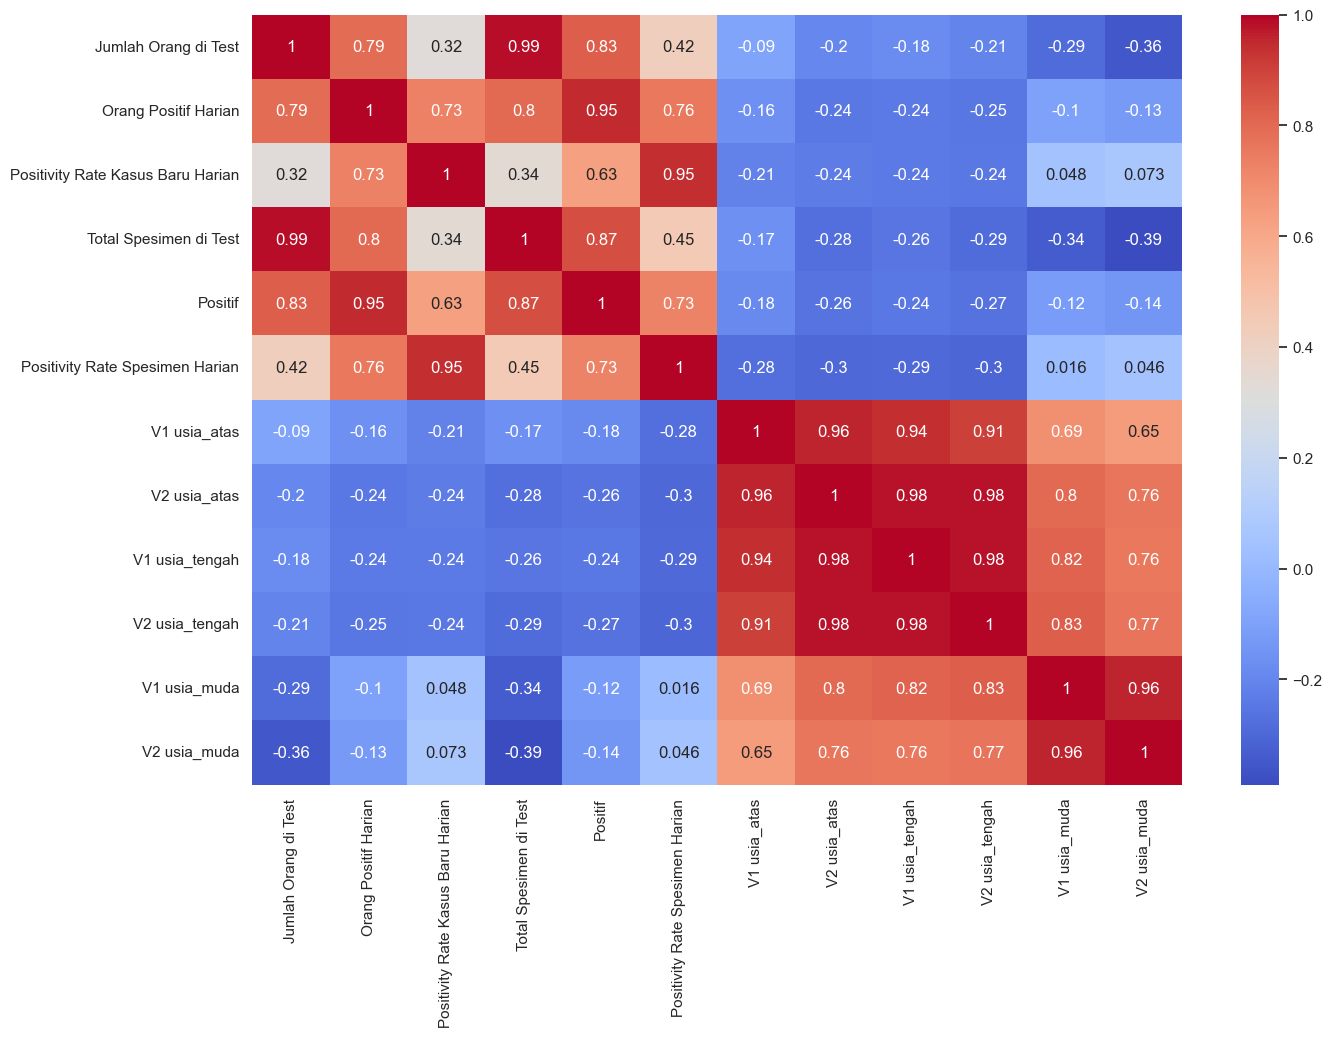

In [57]:
plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

# Menampilkan heatmap
plt.show()

Bisa dilihat bahwa Vaksin 1 dan 2 pada Usia tengah memiliki korelasi yang paling berlawanan dengan jumlah orang positif harian dibandingkan kelompok umur lainya, itu berati vaksinasi pada kelompok usia tengah memiliki dampat terbesar atas naik atau turunya jumlah positif harian. 

Akan tetapi, selisihnya sangat kecil dengan rentang usia atas. Oleh karena itu, keterbatasan data dapat menyebabkan kekurangakuratan saat melakukan prediksi

Kita akan menggunakan data orang positif harian dari positifity rate sebagai output predict yang ingin kita berikan,
dengan parameter :
- Jumlah orang yang di tes
- V1 Usia_atas
- V2 Usia_atas
- V1 Usia_tengah
- V2 Usia_tengah
- V1 Usia_muda
- V2 Usia_muda

In [58]:
features = ['V1 usia_atas','V2 usia_atas','V1 usia_tengah','V2 usia_tengah','V1 usia_muda','V2 usia_muda']
out = ['Positivity Rate Kasus Baru Harian']

X = data[features]
Y = data[out]

In [59]:
X

,V1 usia_atas,V2 usia_atas,V1 usia_tengah,V2 usia_tengah,V1 usia_muda,V2 usia_muda
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
844,9755185.0,8345295.0,1377790.0,1136853.0,852466.0,730570.0
845,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0
846,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0
847,9755185.0,8345301.0,1377790.0,1136853.0,852466.0,730570.0


In [60]:
Y

,Positivity Rate Kasus Baru Harian
0,0.184
1,0.222
2,0.161
3,0.071
4,0.075
...,...
844,0.023
845,0.010
846,0.011
847,0.029


Splitting and test some test regression model
- Linear regression
- Decission tree regression
- Bayessian ridge regression
- Random forest regression
- XGBoost regression

In [61]:
# Splitting train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [62]:
# Decission Tree Regression

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  0.018235035009152658
MSE :  0.0009615805444438624


In [63]:
# Random Forrest Regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

C:\Users\Naufalqii\AppData\Local\Temp\ipykernel_6908\139137683.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MAE :  0.015928705675655814
MSE :  0.0007753083801251541


In [64]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  0.05319402596945079
MSE :  0.004327417328882325


In [65]:
# Bayesian Ridge Regression

from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

MAE :  0.05319402600018295
MSE :  0.004327417340528668


c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# XGBoost Regression

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))

c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE :  0.016345128375337154
MSE :  0.0007724264027946144


K - Fold, with 5 fold for choosing the best model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    
    br_model = BayesianRidge()
    br_model.fit(X_train, y_train)
    
    xgb_model = GradientBoostingRegressor()
    xgb_model.fit(X_train, y_train)

    # Predict
    lr_pred = lr_model.predict(X_test)
    dt_pred = dt_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)
    br_pred = br_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    
    
    # Metrics
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_mse = mean_squared_error(y_test, lr_pred)
    dt_mae = mean_absolute_error(y_test, dt_pred)
    dt_mse = mean_squared_error(y_test, dt_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    br_mae = mean_absolute_error(y_test, br_pred)
    br_mse = mean_squared_error(y_test, br_pred)
    xgb_mae = mean_absolute_error(y_test, xgb_pred)
    xgb_mse = mean_squared_error(y_test, xgb_pred)

    fold_results = {
        'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Bayesian Ridge Regression', 'XGBoost Regression'],
        'MAE': [lr_mae, dt_mae, rf_mae, br_mae, xgb_mae],
        'MSE': [lr_mse, dt_mse, rf_mse, br_mse, xgb_mse]
    }
    
    results.append(pd.DataFrame(fold_results))

results_metrics = pd.concat(results, ignore_index=True)

C:\Users\Naufalqii\AppData\Local\Temp\ipykernel_6908\3903326267.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naufalqii\AppData\Local\Temp\ipykernel_6908\3903326267.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vec

In [68]:
results_metrics.groupby('Model').mean().sort_values(['MSE','MAE'])

,MAE,MSE
Model,,
XGBoost Regression,0.087556,0.013301
Random Forest Regression,0.087721,0.013327
Decision Tree Regression,0.105705,0.019689
Bayesian Ridge Regression,0.292704,0.277989
Linear Regression,0.292704,0.277989


Dikarenakan XGBoost Regression memiliki hasil yang paling bagus, maka akan di gunakan

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X, Y)

c:\Users\Naufalqii\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

Dengan memasukkan jumlah orang yang telah di vaksin pada masing masing kelompok umur dan tingkat vaksin, lalu memberikan jumlah orang yang ingin di test, maka model dapat memberikan prediksi jumlah orang positive dari orang yang di test berdasarkan jumlah vaksin sebagai parameter tadi

In [70]:
params = {
    'Jumlah Orang di Test': 100000,
    'V1 usia_atas' : 2000000,
    'V2 usia_atas' : 3000000,
    'V1 usia_tengah' : 10000000,
    'V2 usia_tengah' : 30000000,
    'V1 usia_muda' : 1000000,
    'V2 usia_muda' : 5000000,
}

def predictPositive(params):
    params = pd.DataFrame(params, index=[0])
    new_params = params.drop(columns=['Jumlah Orang di Test'])
    percent = model.predict(new_params)[0]
    positive = int(params['Jumlah Orang di Test'] * percent / 100 )
    return positive

predictPositive(params)

149